In [1]:
# [1] imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#[2] Reading File
os.chdir('C:\\Users\\Khizar\\Desktop\\Semester - Spring 2021\\5 - Machine Learning 4375\\CSV')
path = os.getcwd()
path

df = pd.read_csv('wine_fraud.csv')

In [3]:
# [3]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [6]:
# [4] unique variables in quality
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

<AxesSubplot:xlabel='quality', ylabel='count'>

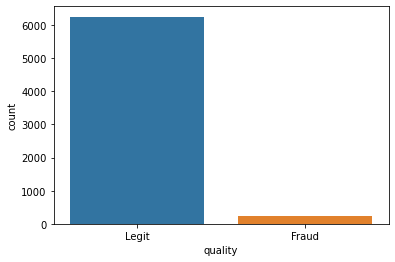

In [7]:
# [5] countplot for quality
sns.countplot(data=df, x='quality', order=df['quality'].value_counts().index)

<AxesSubplot:xlabel='type', ylabel='count'>

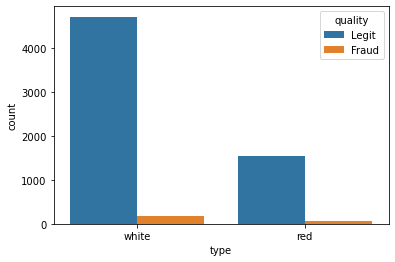

In [8]:
# [6] countplot for wine color with extra columns based on quality
sns.countplot(data=df, x='type', order=df['type'].value_counts().index, hue='quality')

In [9]:
#[7] setting quality to 0 and 1
df = df.applymap(lambda x: 1 if x == 'Legit' else x)
df= df.applymap(lambda x: 0 if x == 'Fraud' else x)

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,red


In [11]:
df.corr()['quality']

fixed acidity          -0.021794
volatile acidity       -0.151228
citric acid             0.061789
residual sugar          0.048756
chlorides              -0.034499
free sulfur dioxide     0.085204
total sulfur dioxide    0.035252
density                -0.016351
pH                     -0.020107
sulphates               0.034046
alcohol                 0.051141
quality                 1.000000
Name: quality, dtype: float64

<AxesSubplot:>

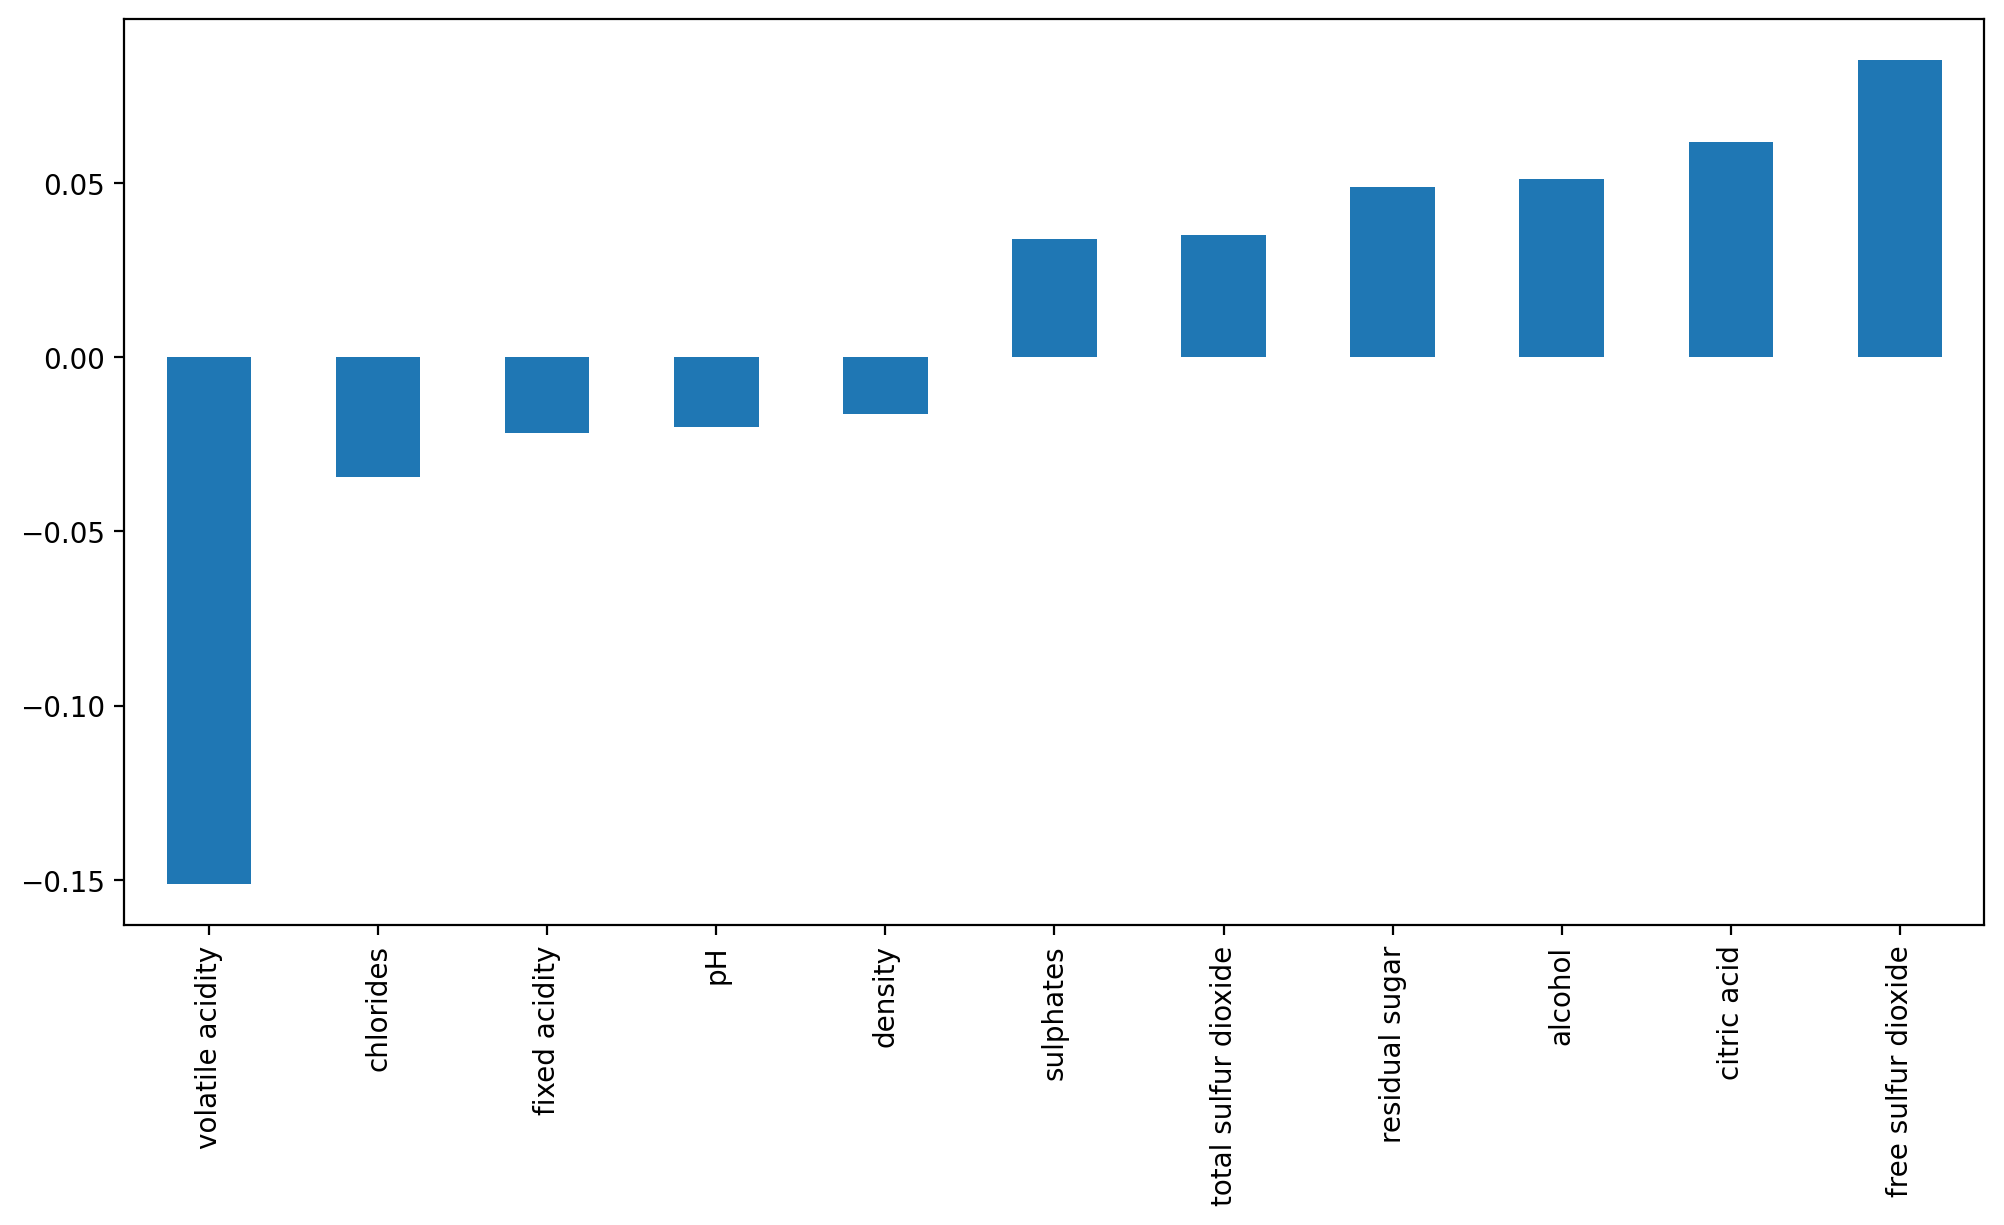

In [12]:
# [8] bar graph based on variable correlation to quality
plt.figure(figsize=(12,6), dpi = 200)
df.corr()['quality'].iloc[:-1].sort_values().plot(kind='bar')

In [13]:
# [9] converting type to dummy
df = pd.get_dummies(df, columns=['type'])

In [14]:
# [10] setting y to quality and x to the rest of the columns
x = pd.get_dummies(df.drop('quality', axis = 1), drop_first = True)
y = df['quality'] 

In [15]:
# [11] performing Train|Test split on the data, with a 10% test size. random state 101
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 101)

In [16]:
from sklearn.svm import SVC

In [17]:
# [12] fitting x and y with balanced weight
y=y.astype('int')
model = SVC(kernel='linear', C=1, class_weight='balanced')
model.fit(x, y)

SVC(C=1, class_weight='balanced', kernel='linear')

In [18]:
# importing svm 
from sklearn import svm
from svm_margin_plot import plot_svm_boundary

ValueError: X.shape[1] = 2 should be equal to 13, the number of features at training time

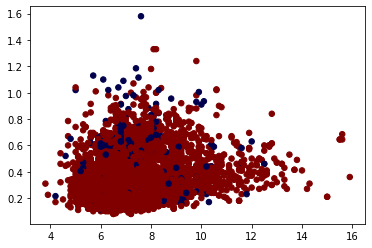

In [19]:
plot_svm_boundary(model, x, y)

In [20]:
# [15] gridsearch
from sklearn.model_selection import GridSearchCV
svm = SVC()
param_grid = {'C':[0.01, 0.1, 1], 'kernel':['linear', 'rbf', 'sigmoid', 'poly'], 'degree': [1,2,3]}
grid = GridSearchCV(svm, param_grid)

In [21]:
grid.fit(x,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'degree': [1, 2, 3],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [22]:
grid.best_score_

0.9621364363119559

In [23]:
grid.best_params_

{'C': 0.01, 'degree': 1, 'kernel': 'linear'}

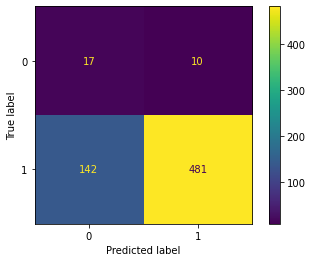

In [24]:
# [15] confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test)

              precision    recall  f1-score   support

           0       0.20      0.04      0.06        27
           1       0.96      0.99      0.98       623

    accuracy                           0.95       650
   macro avg       0.58      0.52      0.52       650
weighted avg       0.93      0.95      0.94       650



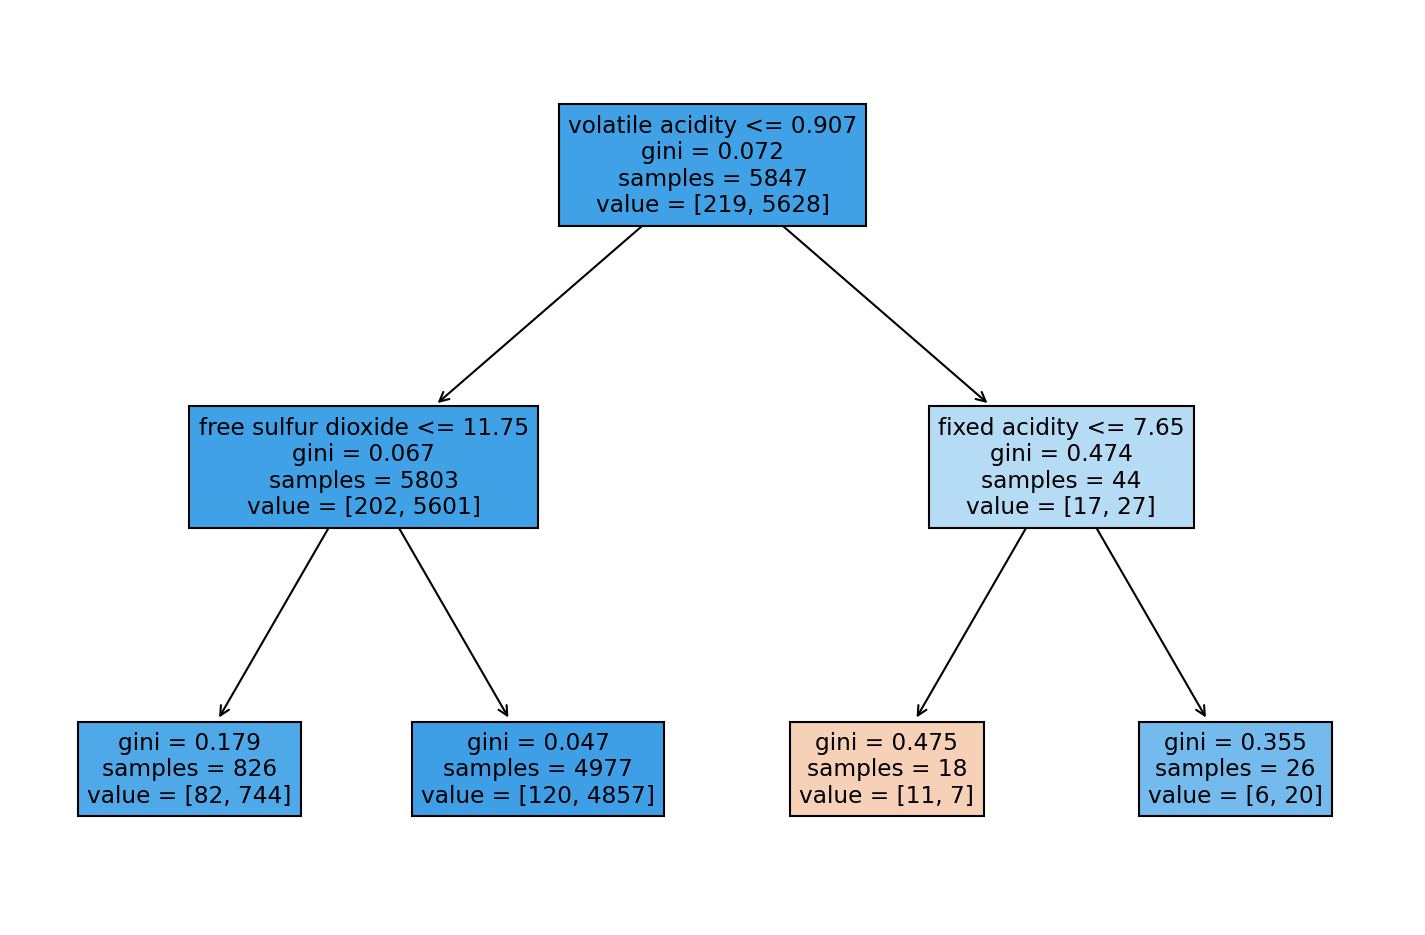

In [33]:
# [15] Classification Report
from sklearn.tree import plot_tree

def report_model(model):
    model_preds = model.predict(x_test)
    print(classification_report(y_test, model_preds))
    plt.figure(figsize = (12,8), dpi=150)
    plot_tree(model, filled = True, feature_names = x.columns);
    
# graphing pruned tree
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(x_train,y_train)
report_model(pruned_tree)

In [34]:
# [16] I think the model performed well. I suggest using it. Realistically it might work but the chances arent too high.

In [35]:
# [17] Creating Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

DTmodel = DecisionTreeClassifier()
DTmodel.fit(x_train, y_train)

DecisionTreeClassifier()

In [36]:
# [17] predicting X test
predictions = DTmodel.predict(x_test)

In [37]:
# [18] confusion matrix 
print(confusion_matrix(y_test, predictions))

[[  4  23]
 [ 20 603]]


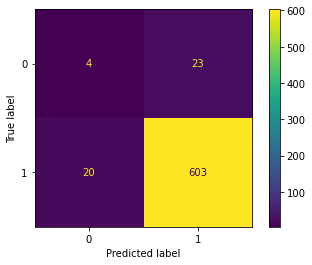

In [38]:
# plotting confusion matrix
plot_confusion_matrix(DTmodel, x_test, y_test)

In [42]:
# Classification Report
def DTreport_model(DTmodel):
    DTmodel_preds = DTmodel.predict(x_test)
    print(classification_report(y_test, DTmodel_preds))
    print('\n')
    plt.figure(figsize = (12,8), dpi=150)
    plot_tree(DTmodel, filled = True, feature_names = x.columns);

              precision    recall  f1-score   support

           0       0.20      0.04      0.06        27
           1       0.96      0.99      0.98       623

    accuracy                           0.95       650
   macro avg       0.58      0.52      0.52       650
weighted avg       0.93      0.95      0.94       650





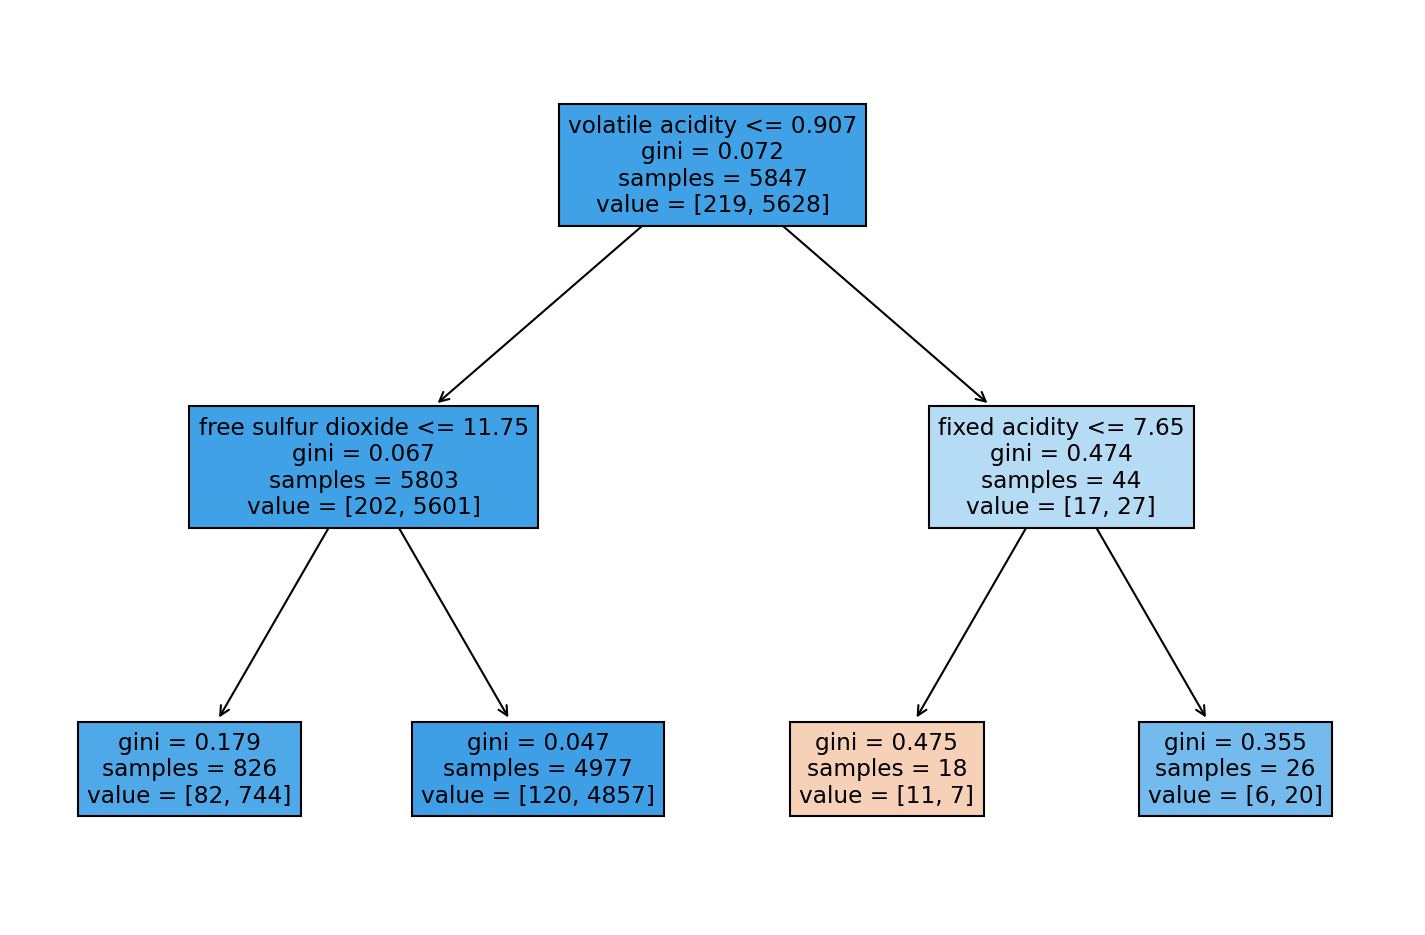

In [43]:
# graphing pruned tree
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(x_train,y_train)
DTreport_model(pruned_tree)

In [44]:
# [19] model performs okay. There are many values for yellow in the confusion matrix. Realistically it could work.